In [2]:
import json
import os
import sys
from tqdm import tqdm

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime


In [4]:
data_df = pd.read_csv("stylus_feature_data.csv")

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16256 entries, 0 to 16255
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16256 non-null  int64  
 1   subquestionId    16256 non-null  object 
 2   studentId        16256 non-null  object 
 3   pressure_mean    16256 non-null  float64
 4   pressure_std     16256 non-null  float64
 5   speed            16256 non-null  float64
 6   interval_mean    16256 non-null  float64
 7   interval_std     16256 non-null  float64
 8   center_x         16256 non-null  float64
 9   center_y         16256 non-null  float64
 10  distribution     16256 non-null  float64
 11  length_mean      16256 non-null  float64
 12  width            16256 non-null  int64  
 13  height           16256 non-null  int64  
 14  accel_mean       16256 non-null  float64
 15  accel_std        16256 non-null  float64
 16  stage            16256 non-null  object 
 17  label       

In [6]:
print(data_df.corr())

                 Unnamed: 0  pressure_mean  pressure_std     speed  \
Unnamed: 0         1.000000       0.005592     -0.001135  0.043120   
pressure_mean      0.005592       1.000000      0.821221  0.253148   
pressure_std      -0.001135       0.821221      1.000000  0.152714   
speed              0.043120       0.253148      0.152714  1.000000   
interval_mean     -0.021547      -0.119589     -0.090929 -0.288315   
interval_std      -0.020536      -0.111999     -0.078960 -0.279663   
center_x           0.019220       0.017215      0.029891 -0.053787   
center_y           0.005904      -0.123556     -0.101411 -0.073535   
distribution      -0.008340      -0.024839      0.033239  0.045157   
length_mean        0.029556       0.123010      0.119130  0.521426   
width             -0.021367       0.130451      0.151864  0.152426   
height             0.007217       0.057625      0.132233  0.091555   
accel_mean         0.022272       0.241369      0.192326  0.750469   
accel_std          0

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report


In [8]:
dataset = data_df.drop(columns = ['Unnamed: 0', 'subquestionId', 'studentId', 'stage', 'label', 'emotion', 'label_encoded', 'emotion_encoded'])
dataset=(dataset-dataset.mean())/dataset.std()
label = data_df['label_encoded']
emotion = data_df['emotion_encoded']

In [9]:
dataset.head()

pressure_mean  pressure_std     speed  interval_mean  interval_std  \
0      -1.443179     -2.223902 -1.074362       0.518679     -0.414884   
1       0.145385      0.372832 -0.763220       0.521480      0.309340   
2       0.047450      0.580084 -0.846174       1.268419      1.091861   
3      -0.411718     -0.272480  0.029830      -0.362092     -0.516651   
4      -0.570342     -0.283610 -0.476912      -0.471447     -0.459781   

   center_x  center_y  distribution  length_mean     width    height  \
0  0.716638 -1.175057      0.739309    -0.612834  1.506263  0.951390   
1 -2.088184  0.837818      0.878145     0.094616  2.311681  1.032813   
2 -0.038097  0.117807      0.871928    -0.307653  2.195833  0.954782   
3 -1.957668  2.622587     -1.040088    -0.282716  0.882891  1.107452   
4 -1.871227  2.651943     -1.647638    -0.420843  1.999995  1.063347   

   accel_mean  accel_std  
0   -1.621425  -1.188435  
1   -0.863928  -0.691948  
2   -0.829773  -0.544820  
3    0.004250   0.077373  
4   -0.695853  -0.632883

In [10]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, shuffle=True, random_state=34)

In [11]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [12]:
y_pred = clf.predict(x_test)

In [13]:


print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.68      0.67      0.68      1663
     class 1       0.66      0.68      0.67      1589

    accuracy                           0.67      3252
   macro avg       0.67      0.67      0.67      3252
weighted avg       0.67      0.67      0.67      3252



In [14]:
x_train, x_test, y_train, y_test = train_test_split(dataset, emotion, test_size=0.2, shuffle=True, random_state=34)
clf = svm.SVC(verbose = True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2']))

[LibSVM].....*.*
optimization finished, #iter = 6567
obj = -6064.405547, rho = -0.422093
nSV = 6555, nBSV = 6142
.......*..*
optimization finished, #iter = 9688
obj = -6255.002610, rho = -0.661066
nSV = 6765, nBSV = 6285
.........*....*
optimization finished, #iter = 13958
obj = -6954.846787, rho = -0.274777
nSV = 7423, nBSV = 6869
Total nSV = 11525
              precision    recall  f1-score   support

     class 0       0.48      0.37      0.42       929
     class 1       0.43      0.02      0.05       936
     class 2       0.49      0.87      0.62      1387

    accuracy                           0.49      3252
   macro avg       0.47      0.42      0.36      3252
weighted avg       0.47      0.49      0.40      3252



In [15]:
x_train, x_test, y_train, y_test = train_test_split(dataset, emotion, test_size=0.2, shuffle=True, random_state=34)
clf = svm.NuSVC(gamma = "auto", verbose = True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2']))

[LibSVM]...........................................................................................................................................................*...*
optimization finished, #iter = 157679
C = 348.350956
obj = 244404.045581, rho = -1.637629
nSV = 5572, nBSV = 2553
...........................................................................................................................*..*
optimization finished, #iter = 124850
C = 151.544951
obj = 95198.506703, rho = -2.471907
nSV = 6244, nBSV = 3586
.......................................
........................................................................................................................................................................................*....*
optimization finished, #iter = 227058
C = 605.659792
obj = 462268.531646, rho = -1.657501
nSV = 6799, nBSV = 3138
Total nSV = 11308
              precision    recall  f1-score   support

     class 0       0.39      0.36      0.37       929
    

In [16]:
def get_accuracy(y_test, y_pred):
    total = len(y_test)
    count = 0
    for val, pred in zip(y_test, y_pred):
        if val == pred:
            count += 1
    return count/total

In [17]:
subq_group = data_df.groupby("subquestionId")
subq_keys = subq_group.groups.keys()
accuracy_list = []
for index, subquestionId in enumerate(subq_keys):
    subquestion = subq_group.get_group(subquestionId)
    dataset_subq = subquestion.drop(columns = ['Unnamed: 0', 'subquestionId', 'studentId', 'stage', 'label', 'emotion', 'label_encoded', 'emotion_encoded'])
    dataset_subq = (dataset_subq-dataset_subq.mean())/dataset_subq.std()
    label_subq = subquestion['label_encoded']
    emotion_subq = subquestion['emotion_encoded']
    x_train, x_test, y_train, y_test = train_test_split(dataset_subq, emotion_subq, test_size=0.3, shuffle=True, random_state=34)
    clf_subq = svm.SVC()
    clf_subq.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy_list.append(get_accuracy(y_test, y_pred))

print(accuracy_list)
accuracy_list = np.array(accuracy_list)
print(np.mean(accuracy_list))

[0.6302521008403361, 0.4796747967479675, 0.6229508196721312, 0.5882352941176471, 0.5454545454545454, 0.4583333333333333, 0.5161290322580645, 0.6585365853658537, 0.4715447154471545, 0.5365853658536586, 0.42857142857142855, 0.5508474576271186, 0.4957983193277311, 0.5245901639344263, 0.4672131147540984, 0.43902439024390244, 0.5564516129032258, 0.5691056910569106, 0.5, 0.5833333333333334, 0.5, 0.3949579831932773, 0.5, 0.5967741935483871, 0.4603174603174603, 0.42857142857142855, 0.55, 0.45454545454545453, 0.42276422764227645, 0.5040650406504065, 0.672, 0.5619834710743802, 0.5206611570247934, 0.5691056910569106, 0.5289256198347108, 0.4166666666666667, 0.496, 0.432, 0.4146341463414634, 0.5040650406504065]
0.5137667420490223


In [18]:
student_group = data_df.groupby("studentId")
student_keys = student_group.groups.keys()
accuracy_list = []
for index, studentId in enumerate(student_keys):
    try:
        student = student_group.get_group(studentId)
        dataset_student = student.drop(columns = ['Unnamed: 0', 'subquestionId', 'studentId', 'stage', 'label', 'emotion', 'label_encoded', 'emotion_encoded'])
        dataset_student = (dataset_student-dataset_student.mean())/dataset_student.std()
        label_student = student['label_encoded']
        emotion_student = student['emotion_encoded']
        x_train, x_test, y_train, y_test = train_test_split(dataset_student, emotion_student, test_size=0.3, shuffle=True, random_state=34)
        clf_student = svm.SVC()
        clf_student.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy_list.append(get_accuracy(y_test, y_pred))
    except ValueError:
        pass

print(accuracy_list)
accuracy_list = np.array(accuracy_list)
print(np.mean(accuracy_list))

[0.4166666666666667, 0.5833333333333334, 0.5, 0.18181818181818182, 0.375, 0.25, 0.3333333333333333, 0.4, 0.5, 0.4444444444444444, 0.5, 0.45454545454545453, 0.4166666666666667, 0.5, 0.25, 0.5833333333333334, 0.5833333333333334, 0.3333333333333333, 0.5, 0.4166666666666667, 0.36363636363636365, 0.5833333333333334, 0.6666666666666666, 0.5454545454545454, 0.9166666666666666, 0.2, 0.5, 0.7272727272727273, 0.36363636363636365, 0.4166666666666667, 0.25, 0.6666666666666666, 0.5, 0.5, 0.14285714285714285, 0.3333333333333333, 0.3333333333333333, 0.25, 0.5, 0.5454545454545454, 0.25, 0.3333333333333333, 0.5454545454545454, 0.5, 0.3333333333333333, 0.5, 0.2727272727272727, 0.18181818181818182, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.5454545454545454, 0.4166666666666667, 0.2, 0.6666666666666666, 0.0, 0.3, 0.5, 0.6, 0.16666666666666666, 0.4444444444444444, 0.5, 0.5833333333333334, 0.8181818181818182, 0.4166666666666667, 0.45454545454545453, 0.0, 0.3333333333333333, 0.66666666666

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


In [27]:
from sklearn.ensemble import RandomForestClassifier

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [25]:
label_group = data_df.groupby("label_encoded")
label_keys = label_group.groups.keys()
accuracy_list = []
for index, labelId in enumerate(label_keys):
    try:
        label = label_group.get_group(labelId)
        dataset_label = label.drop(columns = ['Unnamed: 0', 'subquestionId', 'studentId', 'stage', 'label', 'emotion', 'label_encoded', 'emotion_encoded'])
        dataset_label = (dataset_label-dataset_label.mean())/dataset_label.std()
        emotion_label = label['emotion_encoded']
        x_train, x_test, y_train, y_test = train_test_split(dataset_label, emotion_label, test_size=0.3, shuffle=True, random_state=34)
        clf_student = svm.SVC()
        clf_student.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy_list.append(get_accuracy(y_test, y_pred))
        print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2']))
    except ValueError:
        pass

print(accuracy_list)
accuracy_list = np.array(accuracy_list)
print(np.mean(accuracy_list))

              precision    recall  f1-score   support

     class 0       0.80      0.51      0.63      1223
     class 1       0.68      0.49      0.57       786
     class 2       0.37      0.85      0.51       510

    accuracy                           0.57      2519
   macro avg       0.62      0.62      0.57      2519
weighted avg       0.68      0.57      0.59      2519

              precision    recall  f1-score   support

     class 0       0.28      0.50      0.35       226
     class 1       0.60      0.51      0.55       599
     class 2       0.80      0.76      0.78      1534

    accuracy                           0.67      2359
   macro avg       0.56      0.59      0.56      2359
weighted avg       0.70      0.67      0.68      2359

[0.5724493846764589, 0.6685036032217041]
0.6204764939490814


In [29]:
label_group = data_df.groupby("label_encoded")
label_keys = label_group.groups.keys()
accuracy_list = []
for index, labelId in enumerate(label_keys):
    try:
        label = label_group.get_group(labelId)
        dataset_label = label.drop(columns = ['Unnamed: 0', 'subquestionId', 'studentId', 'stage', 'label', 'emotion', 'label_encoded', 'emotion_encoded'])
        dataset_label = (dataset_label-dataset_label.mean())/dataset_label.std()
        emotion_label = label['emotion_encoded']
        x_train, x_test, y_train, y_test = train_test_split(dataset_label, emotion_label, test_size=0.3, shuffle=True, random_state=34)
        svm1 = svm.SVC()

        sfs1 = SFS(svm1,
                   k_features=5,
                   forward=True,
                   floating=False,
                   n_jobs= -1,
                   verbose=2,
                   scoring='accuracy',
                   cv=4)

        sfs1 = sfs1.fit(x_train, y_train)
        print(sfs1.subsets_)
    except ValueError:
        pass

print(accuracy_list)
accuracy_list = np.array(accuracy_list)
print(np.mean(accuracy_list))





[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  13 | elapsed:    2.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.1s finished

[2022-10-27 14:38:25] Features: 1/5 -- score: 0.46851599727705917[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:    3.1s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.1s finished

[2022-10-27 14:38:29] Features: 2/5 -- score: 0.4717494894486045[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    2.7s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    3.8s finished

[2022-10-27 14:38:33] Features: 3/5 -- score: 0.4729407760381212[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  

{1: {'feature_idx': (6,), 'cv_scores': array([0.47038802, 0.46902655, 0.46630361, 0.46834581]), 'avg_score': 0.46851599727705917, 'feature_names': ('center_y',)}, 2: {'feature_idx': (0, 6), 'cv_scores': array([0.47106875, 0.47038802, 0.47651464, 0.46902655]), 'avg_score': 0.4717494894486045, 'feature_names': ('pressure_mean', 'center_y')}, 3: {'feature_idx': (0, 6, 8), 'cv_scores': array([0.47038802, 0.4758339 , 0.4758339 , 0.46970728]), 'avg_score': 0.4729407760381212, 'feature_names': ('pressure_mean', 'center_y', 'length_mean')}, 4: {'feature_idx': (0, 6, 8, 12), 'cv_scores': array([0.47651464, 0.47038802, 0.47515317, 0.4737917 ]), 'avg_score': 0.4739618788291355, 'feature_names': ('pressure_mean', 'center_y', 'length_mean', 'accel_std')}, 5: {'feature_idx': (0, 6, 8, 9, 12), 'cv_scores': array([0.47106875, 0.4737917 , 0.48604493, 0.4758339 ]), 'avg_score': 0.4766848196051736, 'feature_names': ('pressure_mean', 'center_y', 'length_mean', 'width', 'accel_std')}}


[Parallel(n_jobs=-1)]: Done   8 out of  13 | elapsed:    1.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    1.8s finished

[2022-10-27 14:38:41] Features: 1/5 -- score: 0.645583245243129[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:    1.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.5s finished

[2022-10-27 14:38:44] Features: 2/5 -- score: 0.6457653276955603[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    2.6s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    3.5s finished

[2022-10-27 14:38:47] Features: 3/5 -- score: 0.6459471458773784[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  10 out of

{1: {'feature_idx': (4,), 'cv_scores': array([0.64680233, 0.64534884, 0.64654545, 0.64363636]), 'avg_score': 0.645583245243129, 'feature_names': ('interval_std',)}, 2: {'feature_idx': (4, 9), 'cv_scores': array([0.64534884, 0.64534884, 0.64654545, 0.64581818]), 'avg_score': 0.6457653276955603, 'feature_names': ('interval_std', 'width')}, 3: {'feature_idx': (3, 4, 9), 'cv_scores': array([0.64680233, 0.64389535, 0.64727273, 0.64581818]), 'avg_score': 0.6459471458773784, 'feature_names': ('interval_mean', 'interval_std', 'width')}, 4: {'feature_idx': (3, 4, 8, 9), 'cv_scores': array([0.64607558, 0.64534884, 0.64727273, 0.64509091]), 'avg_score': 0.6459470137420719, 'feature_names': ('interval_mean', 'interval_std', 'length_mean', 'width')}, 5: {'feature_idx': (2, 3, 4, 8, 9), 'cv_scores': array([0.64680233, 0.64534884, 0.64654545, 0.64581818]), 'avg_score': 0.6461286997885836, 'feature_names': ('speed', 'interval_mean', 'interval_std', 'length_mean', 'width')}}
[]
nan


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.5s finished

[2022-10-27 14:38:54] Features: 5/5 -- score: 0.6461286997885836/home/jinotter3/anaconda3/envs/touch_feature/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jinotter3/anaconda3/envs/touch_feature/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [22]:
dataset_with_label = data_df.drop(columns = ['Unnamed: 0', 'subquestionId', 'studentId', 'stage','label', 'emotion', 'emotion_encoded'])
dataset=(dataset-dataset.mean())/dataset.std()

In [23]:
x_train, x_test, y_train, y_test = train_test_split(dataset_with_label, emotion, test_size=0.2, shuffle=True, random_state=34)
clf2 = svm.SVC(verbose = True)
clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2']))

[LibSVM]....
*
optimization finished, #iter = 4631
obj = -6697.372911, rho = -0.462636
nSV = 6807, nBSV = 6733
.....
*
optimization finished, #iter = 5472
obj = -7299.076434, rho = -0.796196
nSV = 7458, nBSV = 7398
..........
*......
*
optimization finished, #iter = 16231
obj = -7327.491956, rho = -0.038076
nSV = 7470, nBSV = 7199
Total nSV = 12007
              precision    recall  f1-score   support

     class 0       0.55      0.18      0.27       929
     class 1       0.27      0.00      0.01       936
     class 2       0.45      0.95      0.61      1387

    accuracy                           0.46      3252
   macro avg       0.42      0.38      0.29      3252
weighted avg       0.42      0.46      0.34      3252



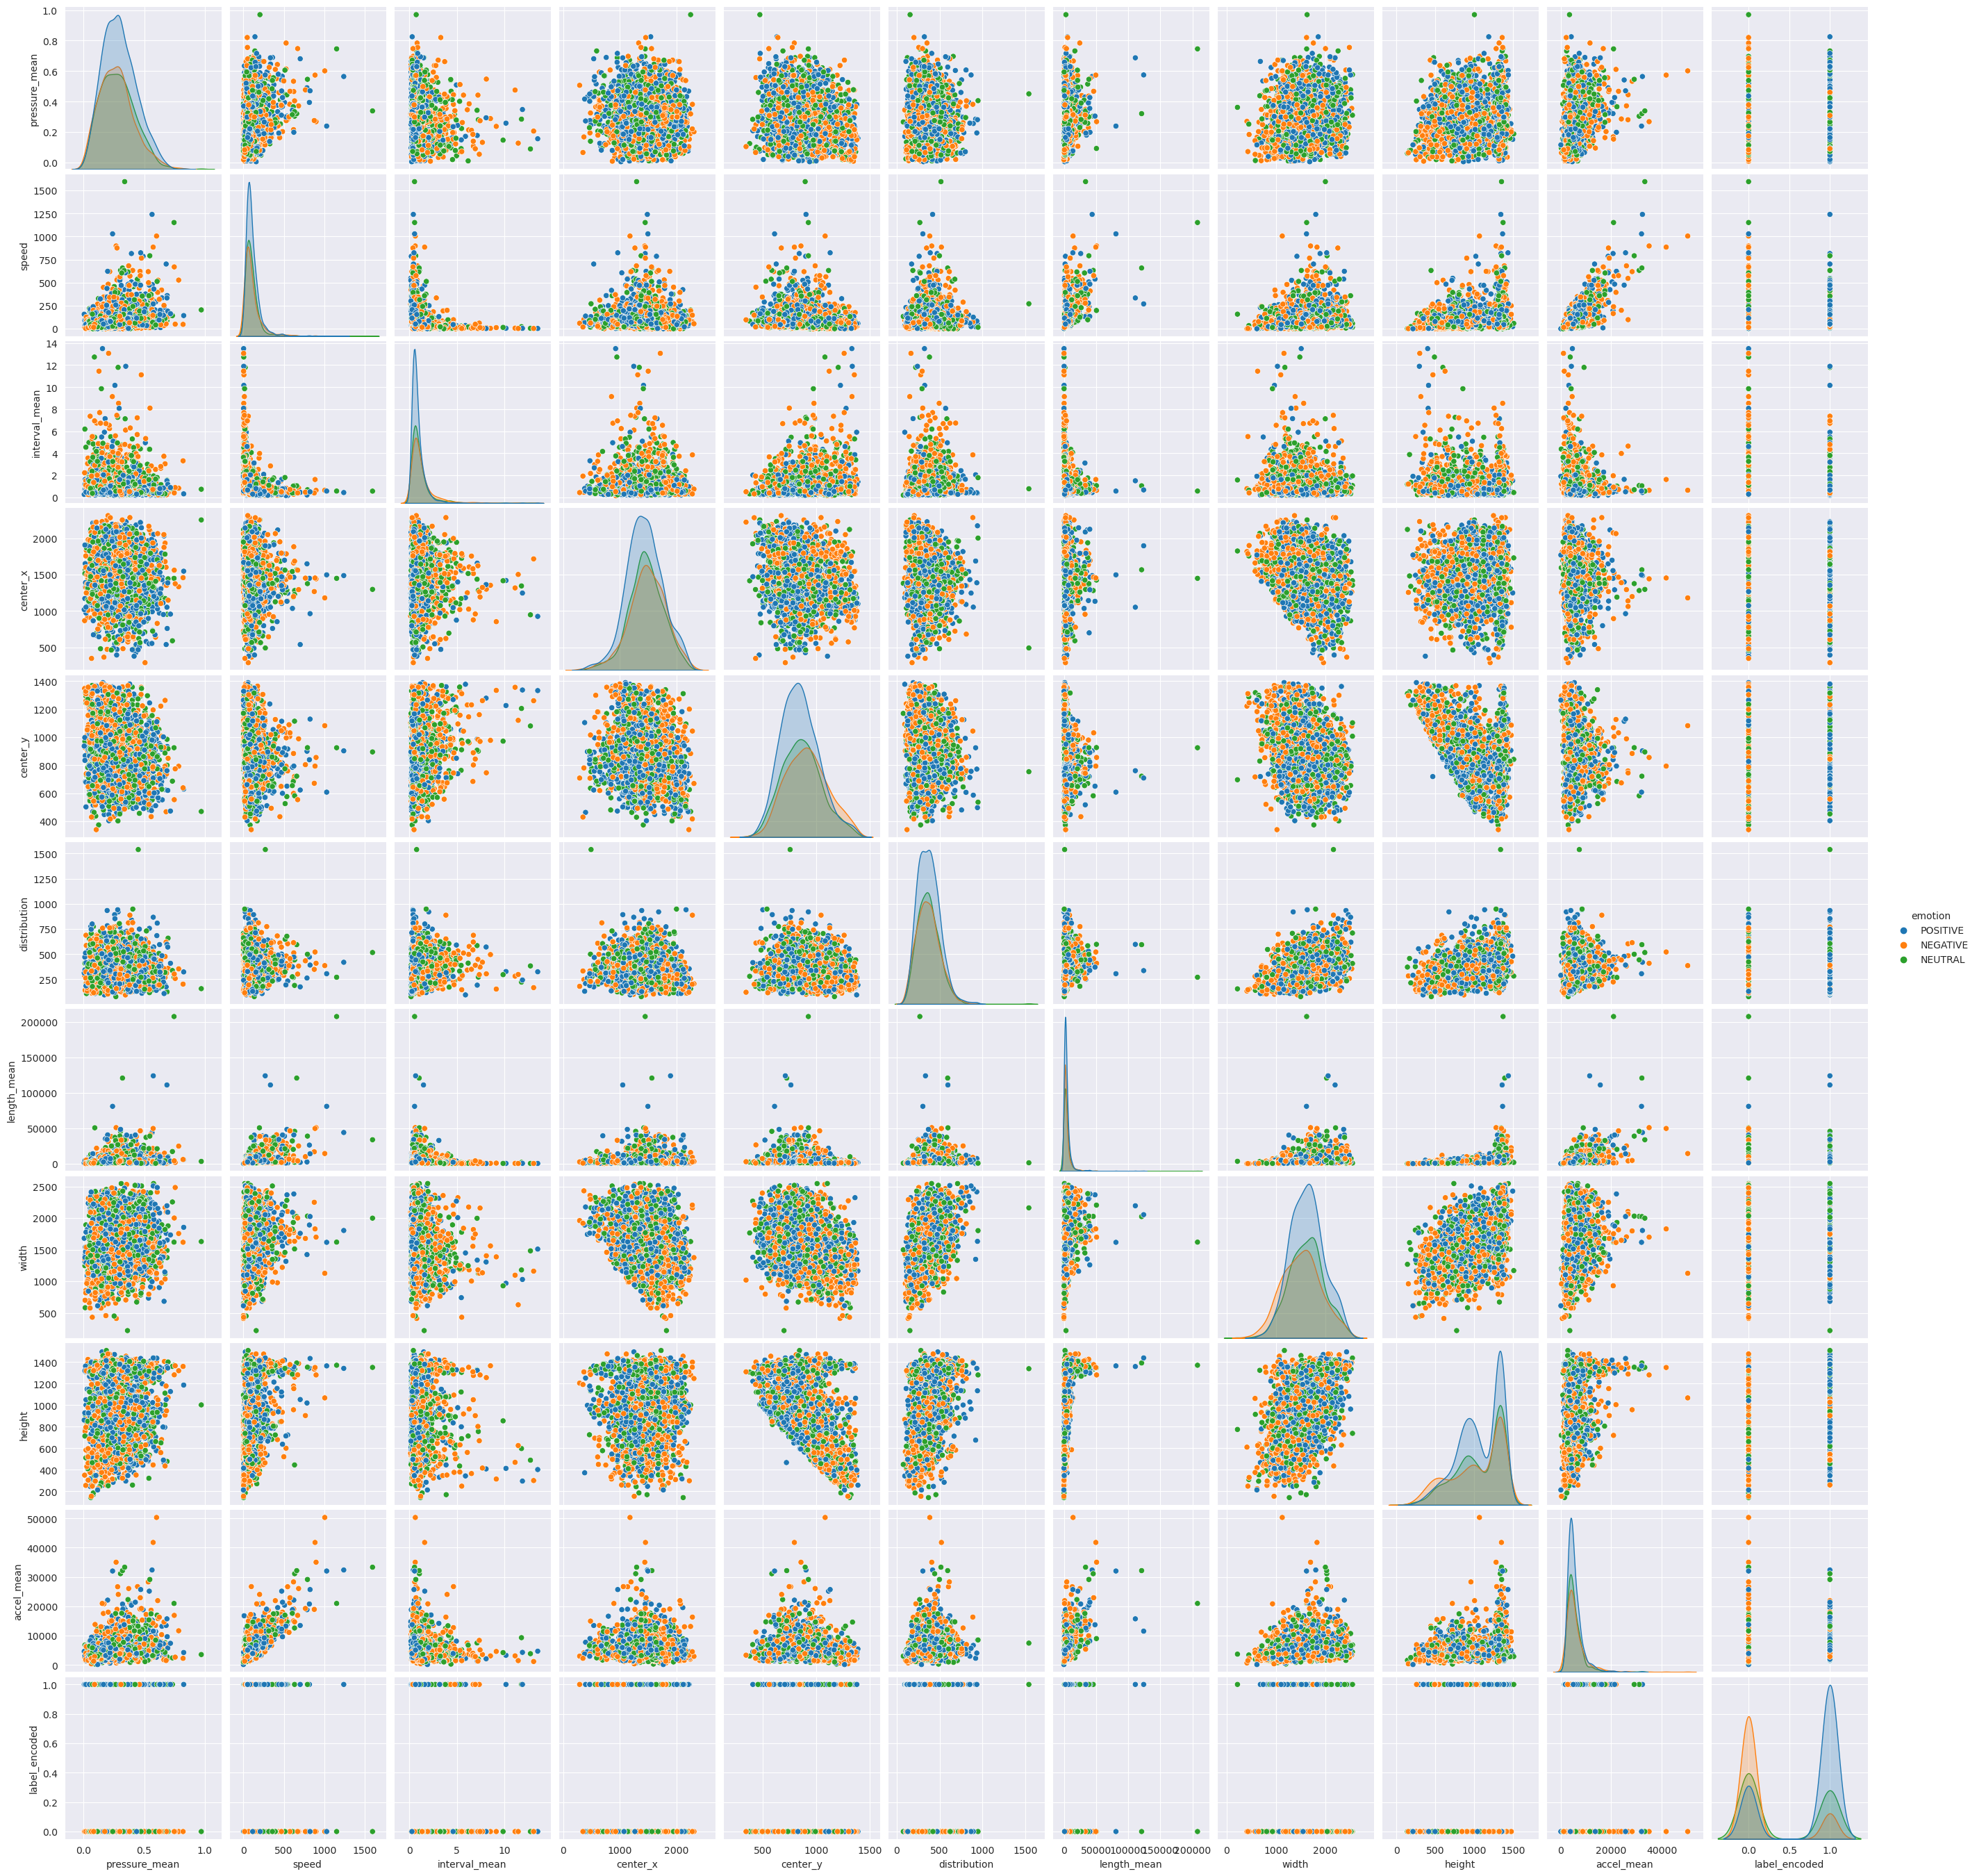

In [24]:
dataset_plot = data_df.drop(columns=['subquestionId', 'Unnamed: 0','studentId', 'stage', 'label', 'emotion_encoded','pressure_std', 'interval_std', 'accel_std'])
plot_group = dataset_plot.groupby('label_encoded')

# print pairplot for each group in plot_group
keys = plot_group.groups.keys()
for key in keys:
    plot_label = plot_group.get_group(key)


x_train, x_test = train_test_split(dataset_plot, test_size=0.2, shuffle=True, random_state=34)
import seaborn as sns

sns.pairplot(x_test, hue = 'emotion')
